### Question 1.

In [162]:
#1

h = 0.1
l1 = [0.1]
for i in range (1,1000000):
    l1.append(l1[i-1] + h)

print(l1[-1])

100000.00000133288


In [163]:
#2

h = 0.1
l2 = []
for i in range (0,1000000):
    l2.append((i+1)*h)
    
print(l2[0],l2[-1])

0.1 100000.0


In [164]:
#3
for i in range(0,7):
    A = 0.1*(10**i)
    print(f'For A = {A}')
    print(f'Error in l1 = {abs(l1[10**i -1] - A)}')
    print(f'Error in l2 = {abs(l2[10**i -1] - A)}')
    print()

For A = 0.1
Error in l1 = 0.0
Error in l2 = 0.0

For A = 1.0
Error in l1 = 1.1102230246251565e-16
Error in l2 = 0.0

For A = 10.0
Error in l1 = 1.9539925233402755e-14
Error in l2 = 0.0

For A = 100.0
Error in l1 = 1.4068746168049984e-12
Error in l2 = 0.0

For A = 1000.0
Error in l1 = 1.588205122970976e-10
Error in l2 = 0.0

For A = 10000.0
Error in l1 = 1.8848368199542165e-08
Error in l2 = 0.0

For A = 100000.0
Error in l1 = 1.3328826753422618e-06
Error in l2 = 0.0



#4 \
No the two algorithms are not similar in accuracy. We see that l2 gives us precise answers and thus the difference in each of the values from 0.1 to 100000 have difference equal to zero. For l1 we see that the error increases by two orders of magnitude for increasing powers of 10

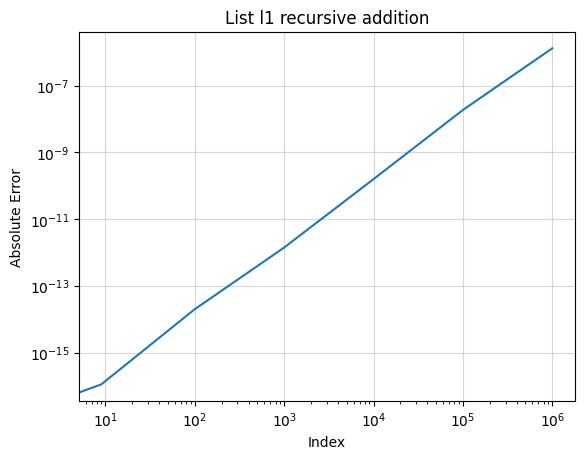

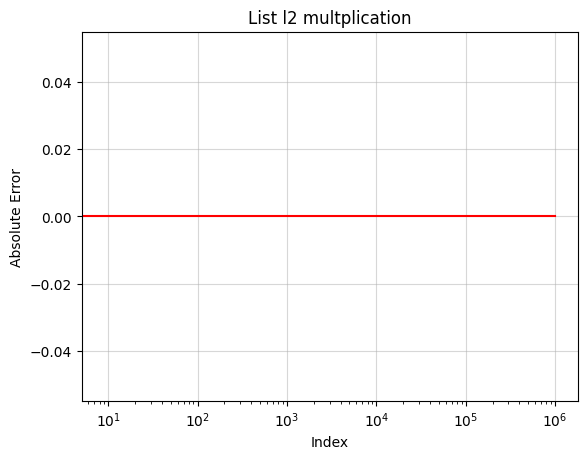

In [165]:
#5 

import matplotlib.pyplot as plt

err1 = [abs(l1[10**i-1] - 0.1*(10**i)) for i in range(0,7)]
err2 = [abs(l2[10**i-1] - 0.1*(10**i)) for i in range(0,7)]
x = [(10**i-1) for i in range(0,7)]

plt.plot(x,err1)
plt.grid(alpha=0.5)
plt.title("List l1 recursive addition")
plt.xlabel("Index")
plt.ylabel("Absolute Error")
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(x,err2, color="red")
plt.grid(alpha=0.5)
plt.title("List l2 multplication")
plt.xlabel("Index")
plt.ylabel("Absolute Error")
plt.xscale('log')

#6 \
In the first algorithm, due do the recursive addtion, the errors get compounded and keep growing with succesive iterations. If $\epsilon_m$ is the relative machine error for the floating point number $h$ and $l[0]$, then the error propagates as follows\
$l[1] = l[0] + h \implies \epsilon_m + \epsilon_m = 2\epsilon_m$\
$l[2] = l[1] + h \implies 2\epsilon_m + \epsilon_m = 3\epsilon_m$\
$.$\
$.$\
$l[n] = l[0] + nh \implies (n+1)\epsilon_m$\
In the second algorithm, as there is no recursion, the errors are constant in each step\
$l[0] = (0+1)*h \implies \epsilon_m$\
$l[1] = (1+1)*h \implies \epsilon_m$\
$.$\
$.$\
$l[n] = (n+1)*h \implies \epsilon_m$

## Question 2

#1\
The convergence expression for the fixed point iteration algorithm is derived from the taylor series expansion of g(x). The true expression is given as\
$x^{(k)}-x^* = g'(x^{(k-1)})(x^{(k-1)}-x^*) + O((x^{(k-1)})^2)$.\
Thus when $g'(x^{(k-1)}) = 0$ we still have terms of $g"(x^{(k-1)})$ and so on

#2\
We have\
$x^{(k)}-x^* = g'(x^{(k-1)})(x^{(k-1)}-x^*) + \dfrac{1}{2}g"(x^{(k-1)})(x^{(k-1)} - x^*)^2 + \dots$\
When $g'(x^{(k-1)}) = 0$\
$x^{(k)}-x^* = \dfrac{1}{2}g"(x^{(k-1)})(x^{(k-1)} - x^*)^2 + O((x^{(k-1)})^3)$\
$\therefore$ We see that the convergence is quadratic

### Question 3

In [166]:
#1

import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**4 - 10*x**3 + 35*x**2 - 50*x + 24

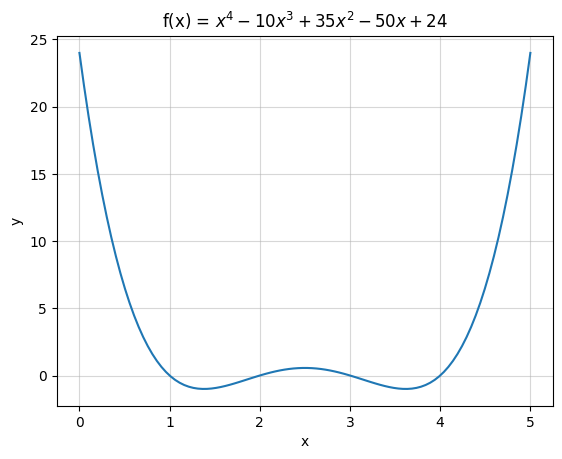

In [167]:
#2

x = np.linspace(0,5,100)
y = f(x)
plt.plot(x,y)
plt.title("f(x) = $x^4 - 10x^3 + 35x^2 - 50x + 24$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.5)

In [168]:
# 3
def CentralFD(f, x, h):
    return (f(x+(h/2)) - f(x-(h/2)))/h
def RichardsonCF(cfd, f, x, h):
    return (4/3)*(cfd(f, x, h/2)) - (1/3)*(cfd(f, x, h))
def analytic(x):
    return 4*x**3 - 30*x**2 + 70*x - 50

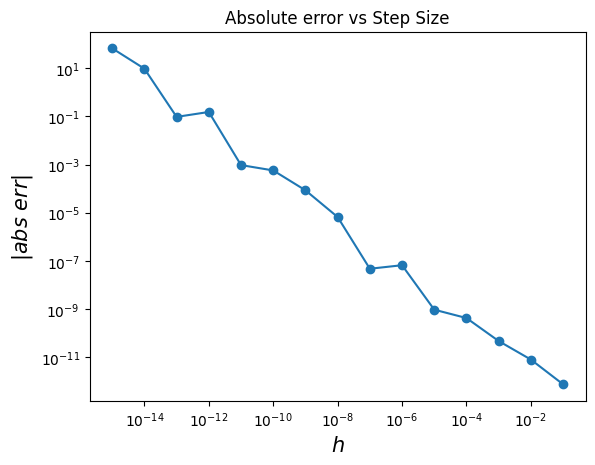

In [174]:
#4
xVal = 2.5
hs = [10.0**(-i) for i in range(1,16)]
CDeriv = np.array([RichardsonCF(CentralFD, f, xVal, h) for h in hs])
ADeriv = analytic(xVal)
err = np.abs(CDeriv-ADeriv)
plt.plot(hs, err, ls='solid', marker='o', label='RCFD')
plt.xscale("log")
plt.yscale("log")
plt.title("Absolute error vs Step Size")
plt.xlabel(r'$h$', fontsize=15)
plt.ylabel(r'$|abs\ err|$', fontsize=15)
plt.show()

We see that the lowest error occurs for step size of h = 0.1

In [175]:
#5
def bisection(a, b, f, kmax=200, tol=1e-8):
    if f(a)*f(b) > 0:
        print("Give a Proper Bracket")
        return
    else:
        for k in range(0,kmax):
            mid = (a+b)/2
            if(f(mid)==0):
                return mid
            a, b = (a, mid) if f(mid) * f(a) < 0 else (mid, b)
            midN = (a+b)/2
            if(np.abs((midN-mid)/midN)<tol):
                return (a+b)/2, k
        else:
            return None

print("The roots are: ")
print(f'{bisection(0.5, 1.5, f)}, {bisection(1.5, 2.5, f)}, {bisection(2.5, 3.5, f)}, {bisection(3.5, 4.5, f)}')

The roots are: 
1.0, 2.0, 3.0, 4.0


In [176]:
#6
print(f"f'(1) = {abs(analytic(1))}")
print(f"f'(2) = {abs(analytic(2))}")
print(f"f'(3) = {abs(analytic(3))}")
print(f"f'(4) = {abs(analytic(4))}")

f'(1) = 6
f'(2) = 2
f'(3) = 2
f'(4) = 6


Comparing the absolute value of derivatives at the roots we see that for roots 1 and 4 the derivative is high compared to roots 2 and 3.\
The change in roots for vertical displacements in the function is minimal for higher values of slope as for large changes in y we have smaller changes in x.  \
For horizontal perturbations, all roots shift laterally equally and hence are equally stable.\
Therefore, 1,4 are most stable and 2,3 are least stable

(-4.0, 6.0)

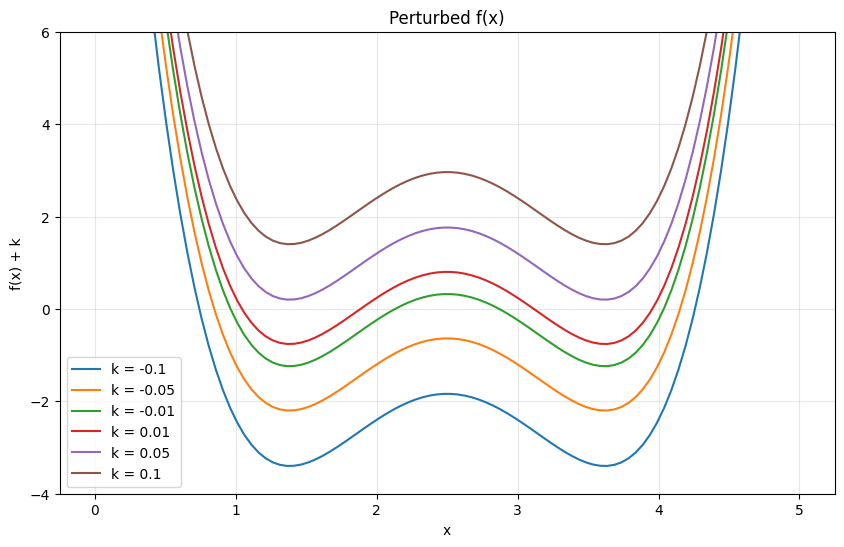

In [177]:
#7a
def g(f, x, k):
    y = f(x)
    return y + k*24
plt.figure(figsize=(10,6))
for k in [-0.1, -0.05, -0.01, 0.01, 0.05, 0.1]:
    gname = "k = " + str(k)
    plt.plot(x, g(f, x, k), label=gname)

plt.grid(alpha=0.3)
plt.title("Perturbed f(x)")
plt.xlabel("x")
plt.ylabel("f(x) + k")
plt.legend(loc='best')
plt.ylim(-4, 6)

#7b\
For $k = -0.1, -0.05$ the graph crosses zero twice\
For $k = -0.01, 0.01$ the graph crosses zero four times\
For $k = 0.05, 0.1$ the graph does not cross zero at all

#7c\
Yes this behaviour is to be expected as due to small perturbations in $f(x)$ the roots 1 and 4 only displace slightly and disappear for 2 out of 6 cases , however roots 2 and 3 disappear for 4 out of 6 cases

#7d\
The functions always have 4 roots. Sometimes the roots are complex depending on the nature of the discriminant of the polynomial.

## Question 4

#1\
In automatic differentiation we consider the operation of ordered pairs. For the given function:\
$f(x) = \frac{(x-5)(x-6)\sqrt{x}}{(x-7)} + \ln(8x)$\
\
or in ordered pair form, the derivative evaluated at x is given by.\
\
$\overline{f(\overline{x})} = \dfrac{(\bar{x} - \bar{5})(\bar{x} - \bar{6})\sqrt{\bar{x}}}{(\bar{x} - \bar{7})} + \ln(\bar{8}\bar{x})$\
\
$ = ((x,1) - (5,0))\times((x,1) - (6,0))\times(\sqrt{x}, \dfrac{1}{2\sqrt{x}}) \div ((x,1) - (7,0))  + (\ln(8x),1/x)$\
\
$ = (x-5,1)\times(x-6,1)\times(\sqrt{x}, \dfrac{1}{2\sqrt{x}}) \div (x-7,1)  + (\ln(8x),1/x)$\
\
$ = (x^2-11x+30,2x-11)\times(\sqrt{x}, \dfrac{1}{2\sqrt{x}}) \div (x-7,1)  + (\ln(8x),1/x)$\
\
$ = (x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x}, 2x\sqrt{x} -11\sqrt{x} + 1/2(x\sqrt{x}-11\sqrt{x} + 30/\sqrt{x}))\div (x-7,1)  + (\ln(8x),1/x)$\
\
$ = (x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x}, \dfrac{5}{2}x\sqrt{x} -\dfrac{33}{2}\sqrt{x} + 15/\sqrt{x})\div (x-7,1)  + (\ln(8x),1/x)$\
\
$ = (\dfrac{x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x}}{x-7}, \dfrac{(\dfrac{5}{2}x\sqrt{x} -\dfrac{33}{2}\sqrt{x} + 15/\sqrt{x})(x-7) - (1)(x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x})}{(x-7)^2} + (\ln(8x),1/x)$\
\
$ = (\dfrac{x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x}}{x-7}, \dfrac{3x^2\sqrt{x} - 46x\sqrt{x}+201\sqrt{x} -210/\sqrt{x}}{2(x-7)^2} + (\ln(8x),1/x)$\
\
$ = (\dfrac{x^2\sqrt{x} - 11x\sqrt{x} +30\sqrt{x}}{x-7} + \ln(8x), \dfrac{3x^2\sqrt{x} - 46x\sqrt{x}+201\sqrt{x} -210/\sqrt{x}}{2(x-7)^2}+ \dfrac{1}{x})$

#2\
From the evaluated expression we get f(4) = $-\dfrac{4}{3}+\ln(32) = 2.132402569$\
and, f'(4) = $\dfrac{59}{36} = 1.638888889$

In [74]:
#3
import sympy
x = sympy.symbols('x')
expr = (x - 5)*(x - 6)*sympy.sqrt(x)/(x - 7) + sympy.log(8*x)
deriv = sympy.diff(expr, x)
print(expr.evalf(subs={x:4}))
print(deriv.evalf(subs={x:4}))

2.13240256946639
1.63888888888889


## Question 5

#1\
At $x=0$ we run into a 0/0 error. Evaluating the limit we have\
\
$\lim_{x\rightarrow 0} \dfrac{1-\cos x}{x^2}$\
\
$\lim_{x\rightarrow 0} \dfrac{\sin x}{2x}$, Using L'Hopitals Rule\
\
$\lim_{x\rightarrow 0} \dfrac{\cos x}{2} = \dfrac{1}{2}$

In [76]:
#2
def f(x):
    return (1 - np.cos(x))/x**2

#3\
To avoid catastrophic cancellation caused by $1-\cos x$, we make use of the trigonometric identity $2\sin^2 x = 1 - \cos 2x$\
\
$\therefore f(x) = \dfrac{2\sin^2(x/2)}{x^2}$

In [77]:
#4
def g(x):
    return 2*(np.sin(x/2))**2/x**2

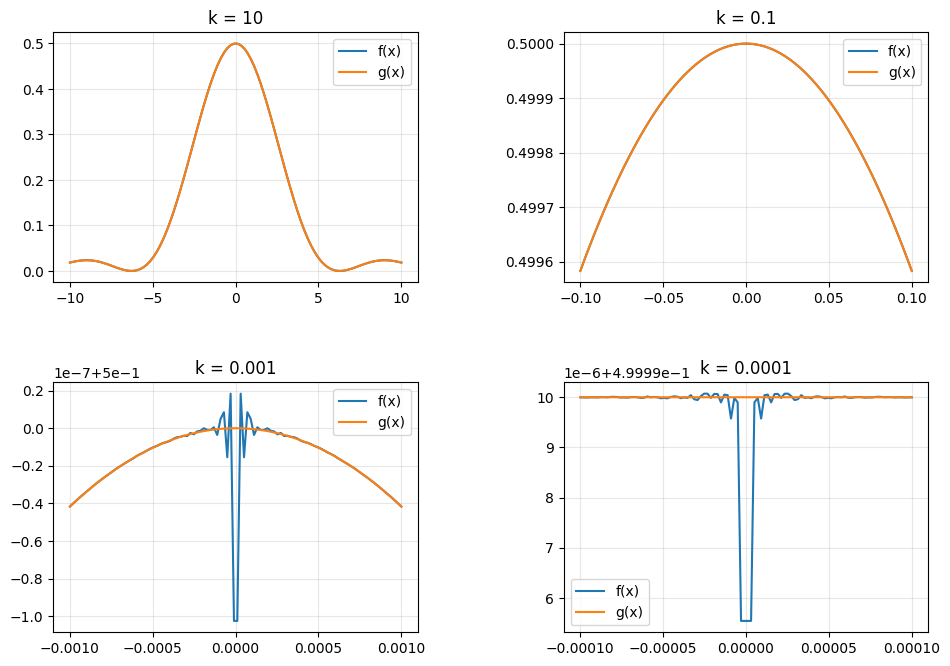

In [79]:
#5
plt.figure(figsize=(10,6))
for i, k in enumerate([10, 0.1, 1e-3, 1e-4]):
    plt.subplot(2, 2, i+1)
    x = np.linspace(-k,k,100)
    title = "k = " + str(k)
    plt.plot(x, f(x), label="f(x)")
    plt.plot(x, g(x), label="g(x)")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.legend(loc='best')
plt.subplots_adjust(bottom=0, right=1.0, top=1.0, hspace=0.4, wspace=0.4)

#6\
As we can see the modified function behaves better for small values of x. The oscillations in f(x) are caused by catastrophic cancellation due to $1-\cos x$

In [80]:
#7
g(0)

/tmp/ipykernel_2953/2382112535.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return 2*(np.sin(x/2))**2/x**2


np.float64(nan)

#7\
As we see the function still outputs nan due to 0/0 error.

In [81]:
#8
def modig(x):
    taylor = 1/2
    fact = 2
    for i in range(4,10000,2):
        prev = taylor
        fact = fact*(i)*(i-1)
        taylor = prev + (-1)**(i%4/2 + 1)*x**(i-2)/fact
        if abs((prev - taylor)/taylor) < 1e-8:
            return taylor
    return(taylor)

modig(0)

0.5

## Question 6

In [180]:
#1
def f(x):
    return np.exp(-x**2)

In [181]:
#2
def analytic(x):
    return -2*x*np.exp(-x**2)

In [182]:
#3
def CentralFD(f, x, h):
    return (f(x+0.5*h) - f(x-0.5*h))/h

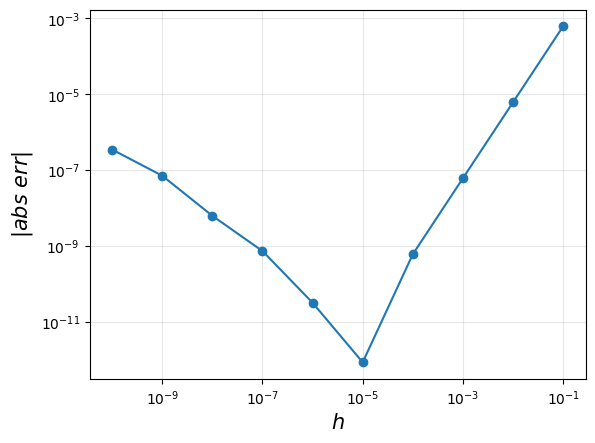

In [183]:
#4
xVal = 1
hs = [10.0**(-i) for i in range(1,11)]
CDeriv = np.array([CentralFD(f, xVal, h) for h in hs])
ADeriv = analytic(xVal)
err = np.abs(CDeriv-ADeriv)
plt.plot(hs, err, ls='solid', marker='o', label='CFD')
plt.grid(alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$h$', fontsize=15)
plt.ylabel(r'$|abs\ err|$', fontsize=15)
plt.show()

In [184]:
#5
def tangent(deriv, x):
    angle = np.arctan(deriv(x))
    if(angle<0):
        angle = angle+np.pi
    return angle

def normal(deriv, x):
    angle = np.arctan(deriv(x))
    return abs(angle + np.pi/2)


(-1.0, 2.0)

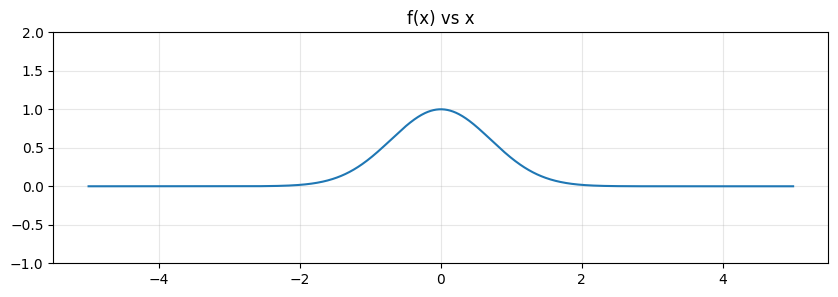

In [185]:
#6
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,3))
plt.plot(x, f(x))
plt.grid(alpha=0.3)
plt.title("f(x) vs x")
plt.ylim(-1,2)

(-1.5, 1.5)

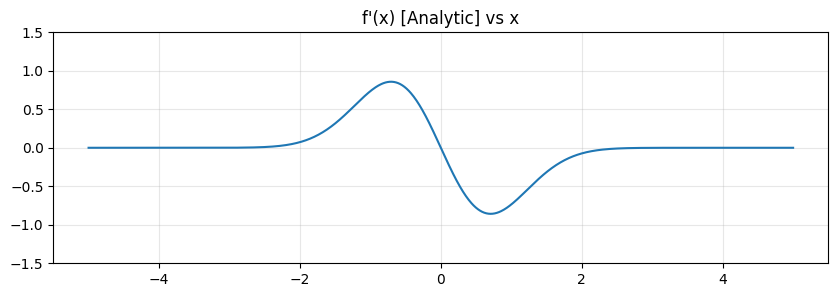

In [186]:
#7
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,3))
plt.plot(x, analytic(x))
plt.grid(alpha=0.3)
plt.title("f'(x) [Analytic] vs x")
plt.ylim(-1.5,1.5)

(-1.5, 1.5)

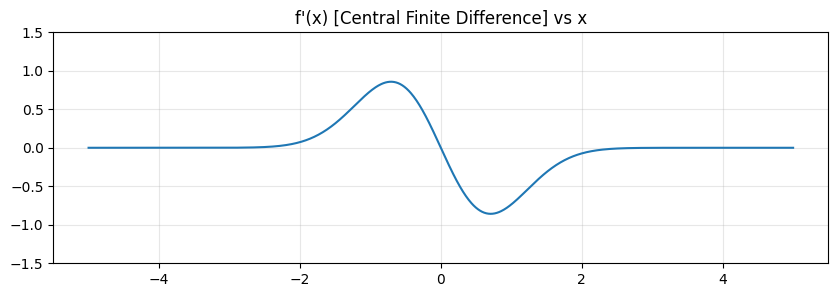

In [187]:
#8
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,3))
plt.plot(x, CentralFD(f, x, 1e-5))
plt.grid(alpha=0.3)
plt.title("f'(x) [Central Finite Difference] vs x")
plt.ylim(-1.5,1.5)

Yes both the analytic and CFD graphs match well

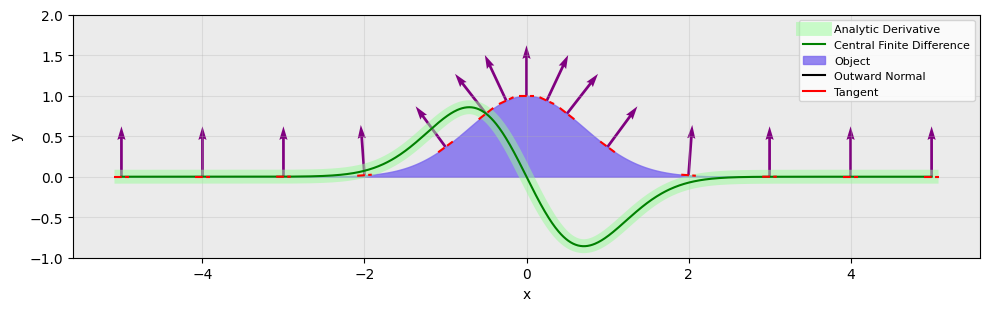

In [188]:
#9, 10
def norm_vec(normal, deriv, x):
    theta = normal(deriv, x)
    return np.cos(theta), np.sin(theta)

plt.figure(figsize=(10,10))
plt.grid(alpha=0.3)
plt.gca().set_facecolor('#ebebeb')
plt.plot(x,analytic(x),color="palegreen",alpha=0.5,linewidth=10,label="Analytic Derivative")
plt.plot(x,CentralFD(f, x, 1e-5),color="green",label="Central Finite Difference")
plt.fill_between(x,f(x),0,color="mediumslateblue",label="Object", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.ylim([-1,2])
    
xi=[-5, -4, -3, -2, -1, -0.5, -0.25, 0, 0.25, 0.5, 1, 2, 3, 4, 5]
plt.plot(0,0,color="black",label="Outward Normal")
plt.plot(0,0,color="red",label="Tangent")
for i in xi:
    u,v=norm_vec(normal, analytic, i)
    plt.quiver(i,f(i),u,v,width=0.003, color="purple")
    k=np.linspace(i-0.09,i+0.09,100)
    m=np.tan(tangent(analytic, i))
    plt.plot(k,f(i)+m*(k-i),color="red", ls="dashed")
plt.legend(fontsize=8)